## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Jul 23 09:23:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="50" alt="Gdrive-logo"/></center>
#@markdown <center><h3>Mount GDrive to /content/drive</h3></center><br>
MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive!
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

Mounted at /content/drive


In [8]:
!tar -xvf "/content/drive/My Drive/Copy of pan-aaddhar-sample-yolo-format-cnt-1k.tar"

pan-aaddhar-sample-yolo-format-cnt-1k/
pan-aaddhar-sample-yolo-format-cnt-1k/custom_dataset.yaml
pan-aaddhar-sample-yolo-format-cnt-1k/val/
pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_428.txt
pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_820.txt
pan-aaddhar-sample-yolo-format-cnt-1k/val/pancard_495.txt
pan-aaddhar-sample-yolo-format-cnt-1k/val/pancard_511.txt
pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_232.txt
pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_250.txt
pan-aaddhar-sample-yolo-format-cnt-1k/val/pancard_117.txt
pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_266.jpg
pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_70.jpg
pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_342.txt
pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_580.jpg
pan-aaddhar-sample-yolo-format-cnt-1k/val/pancard_495.png
pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_382.jpg
pan-aaddhar-sample-yolo-format-cnt-1k/val/pancard_557.txt
pan-

In [6]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [30]:
text = """
train: /content/pan-aaddhar-sample-yolo-format-cnt-1k/train
val: /content/pan-aaddhar-sample-yolo-format-cnt-1k/val

# number of classes
nc: 2

# class names
names: ['aadhar','pan']
"""
with open("data2.yaml", 'w') as file:
    file.write(text)

In [31]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data=data2.yaml epochs=10 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data2.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace

In [32]:
!ls {HOME}/runs/segment/train2/

args.yaml					    results.png
BoxF1_curve.png					    train_batch0.jpg
BoxP_curve.png					    train_batch1.jpg
BoxPR_curve.png					    train_batch2.jpg
BoxR_curve.png					    val_batch0_labels.jpg
confusion_matrix.png				    val_batch0_pred.jpg
events.out.tfevents.1690106280.ab81385cf74e.9641.0  val_batch1_labels.jpg
MaskF1_curve.png				    val_batch1_pred.jpg
MaskP_curve.png					    val_batch2_labels.jpg
MaskPR_curve.png				    val_batch2_pred.jpg
MaskR_curve.png					    weights
results.csv


/content


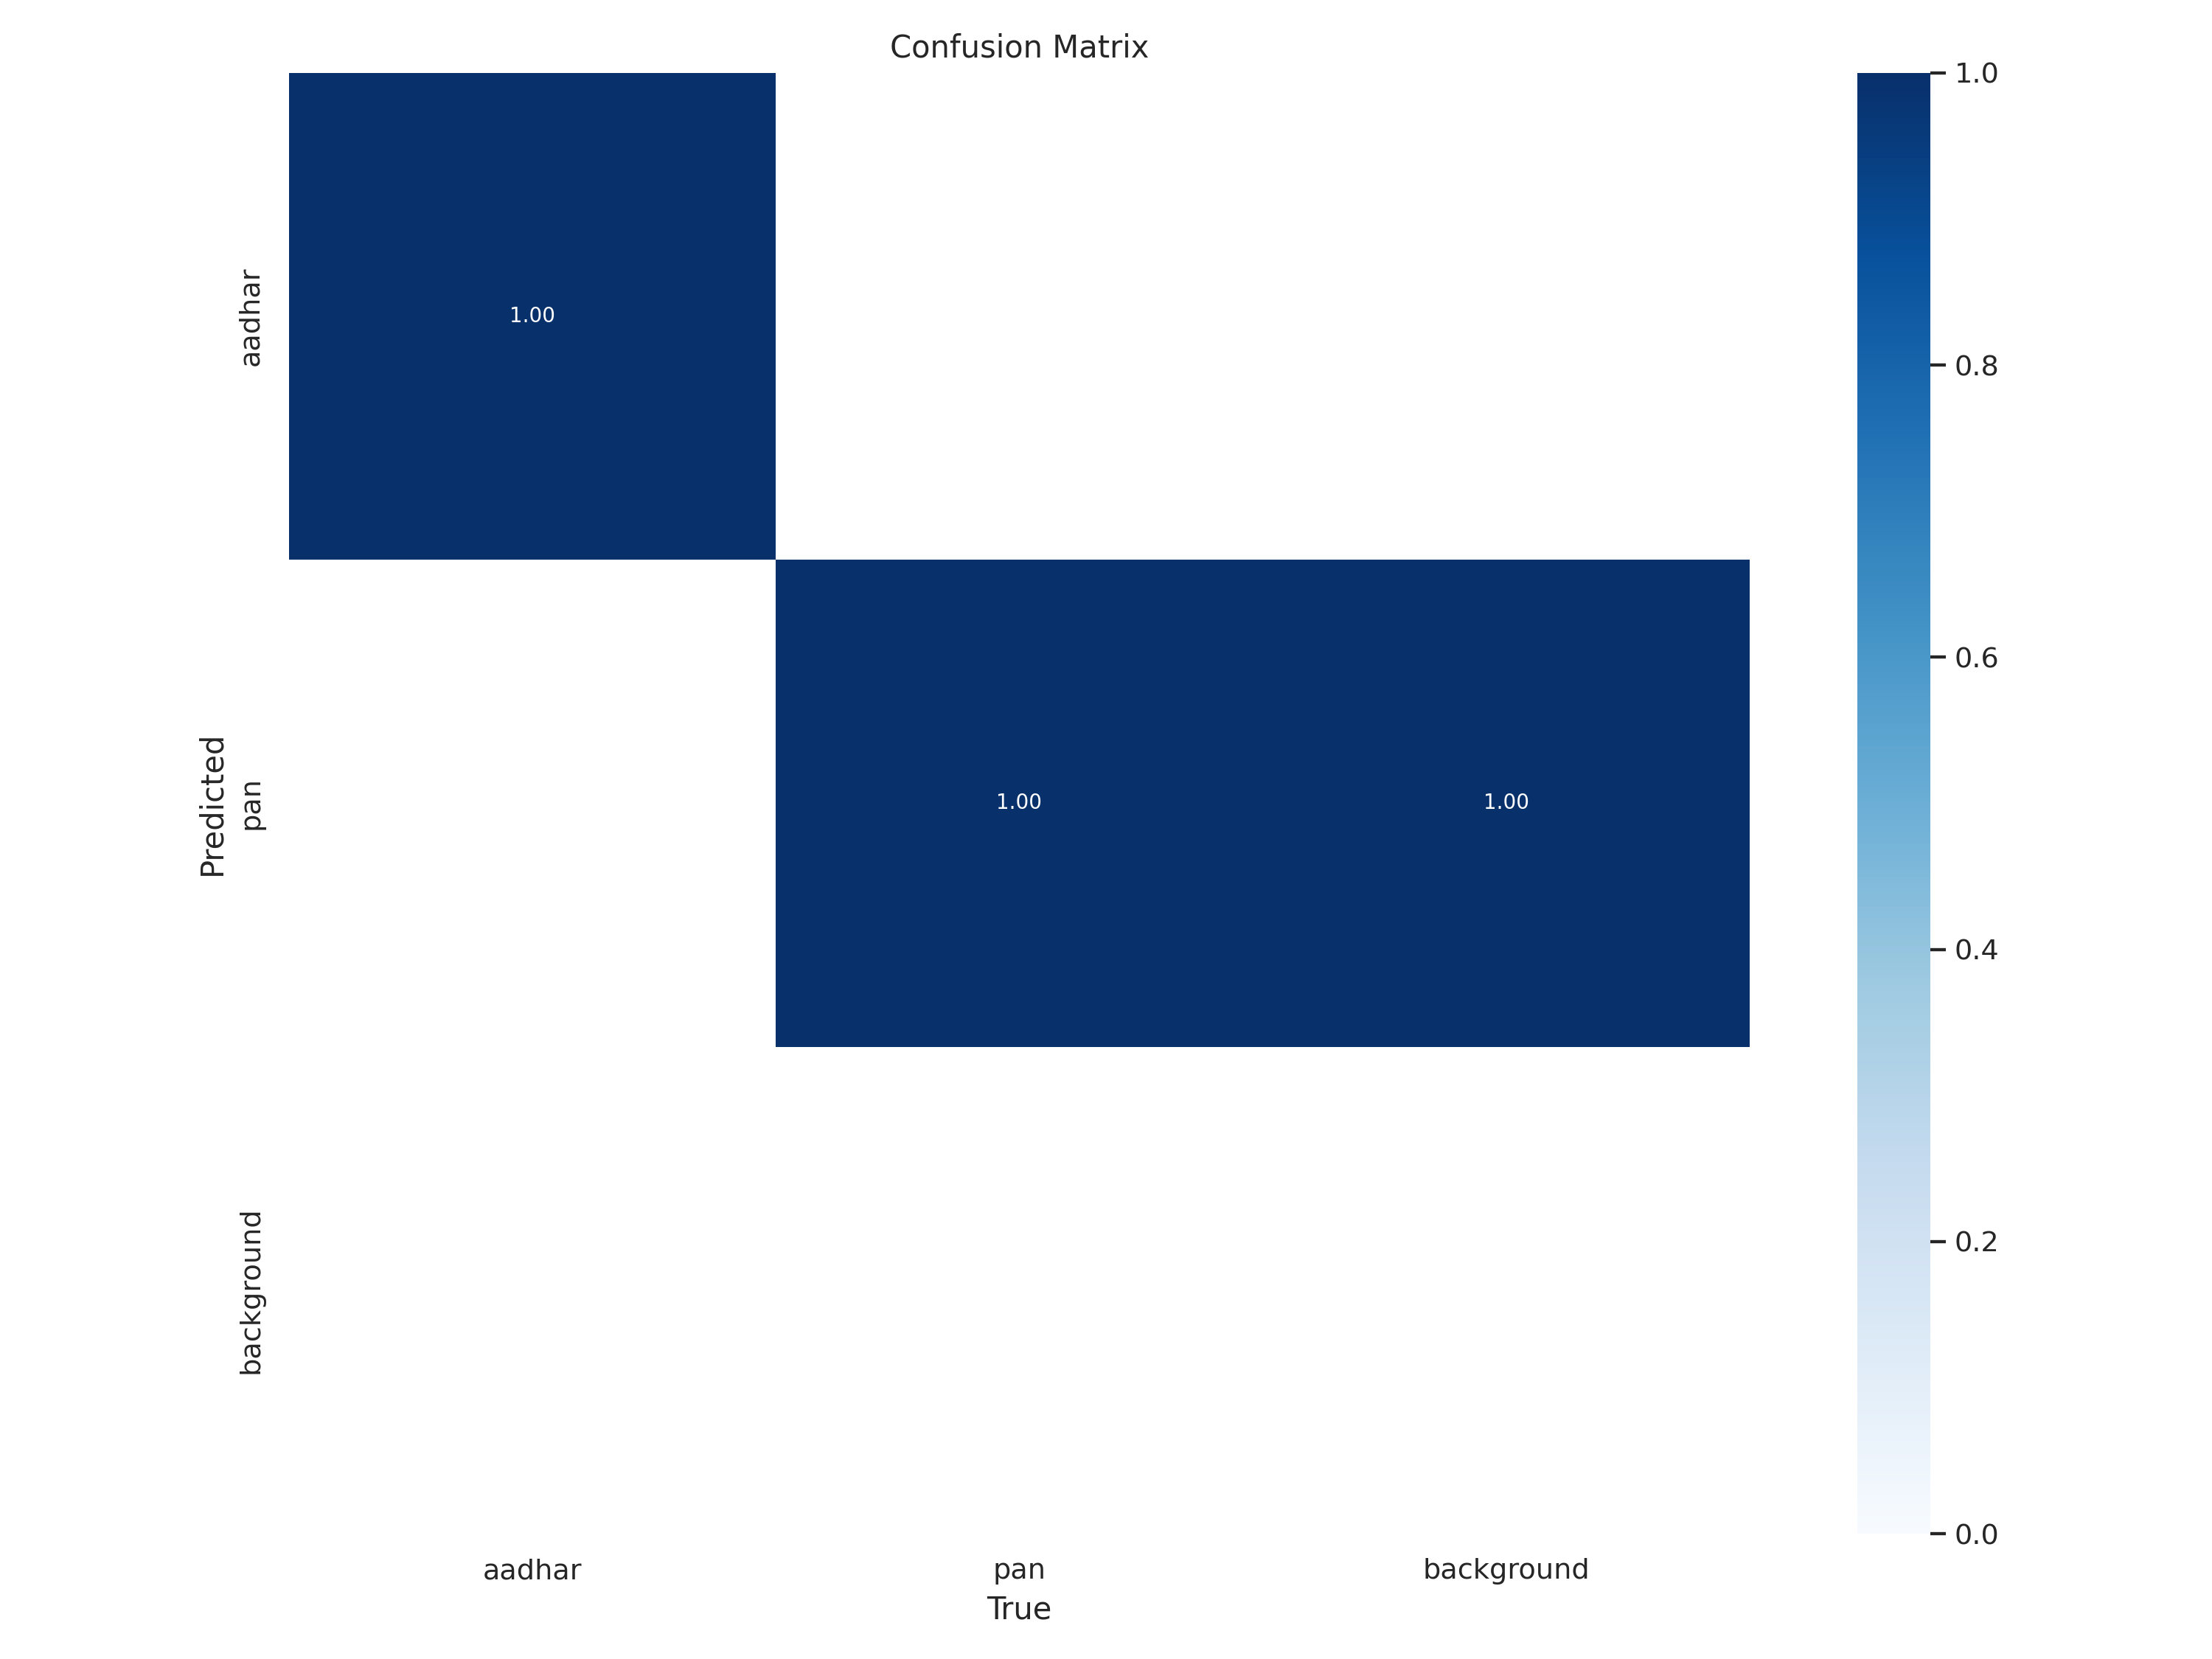

In [33]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

/content


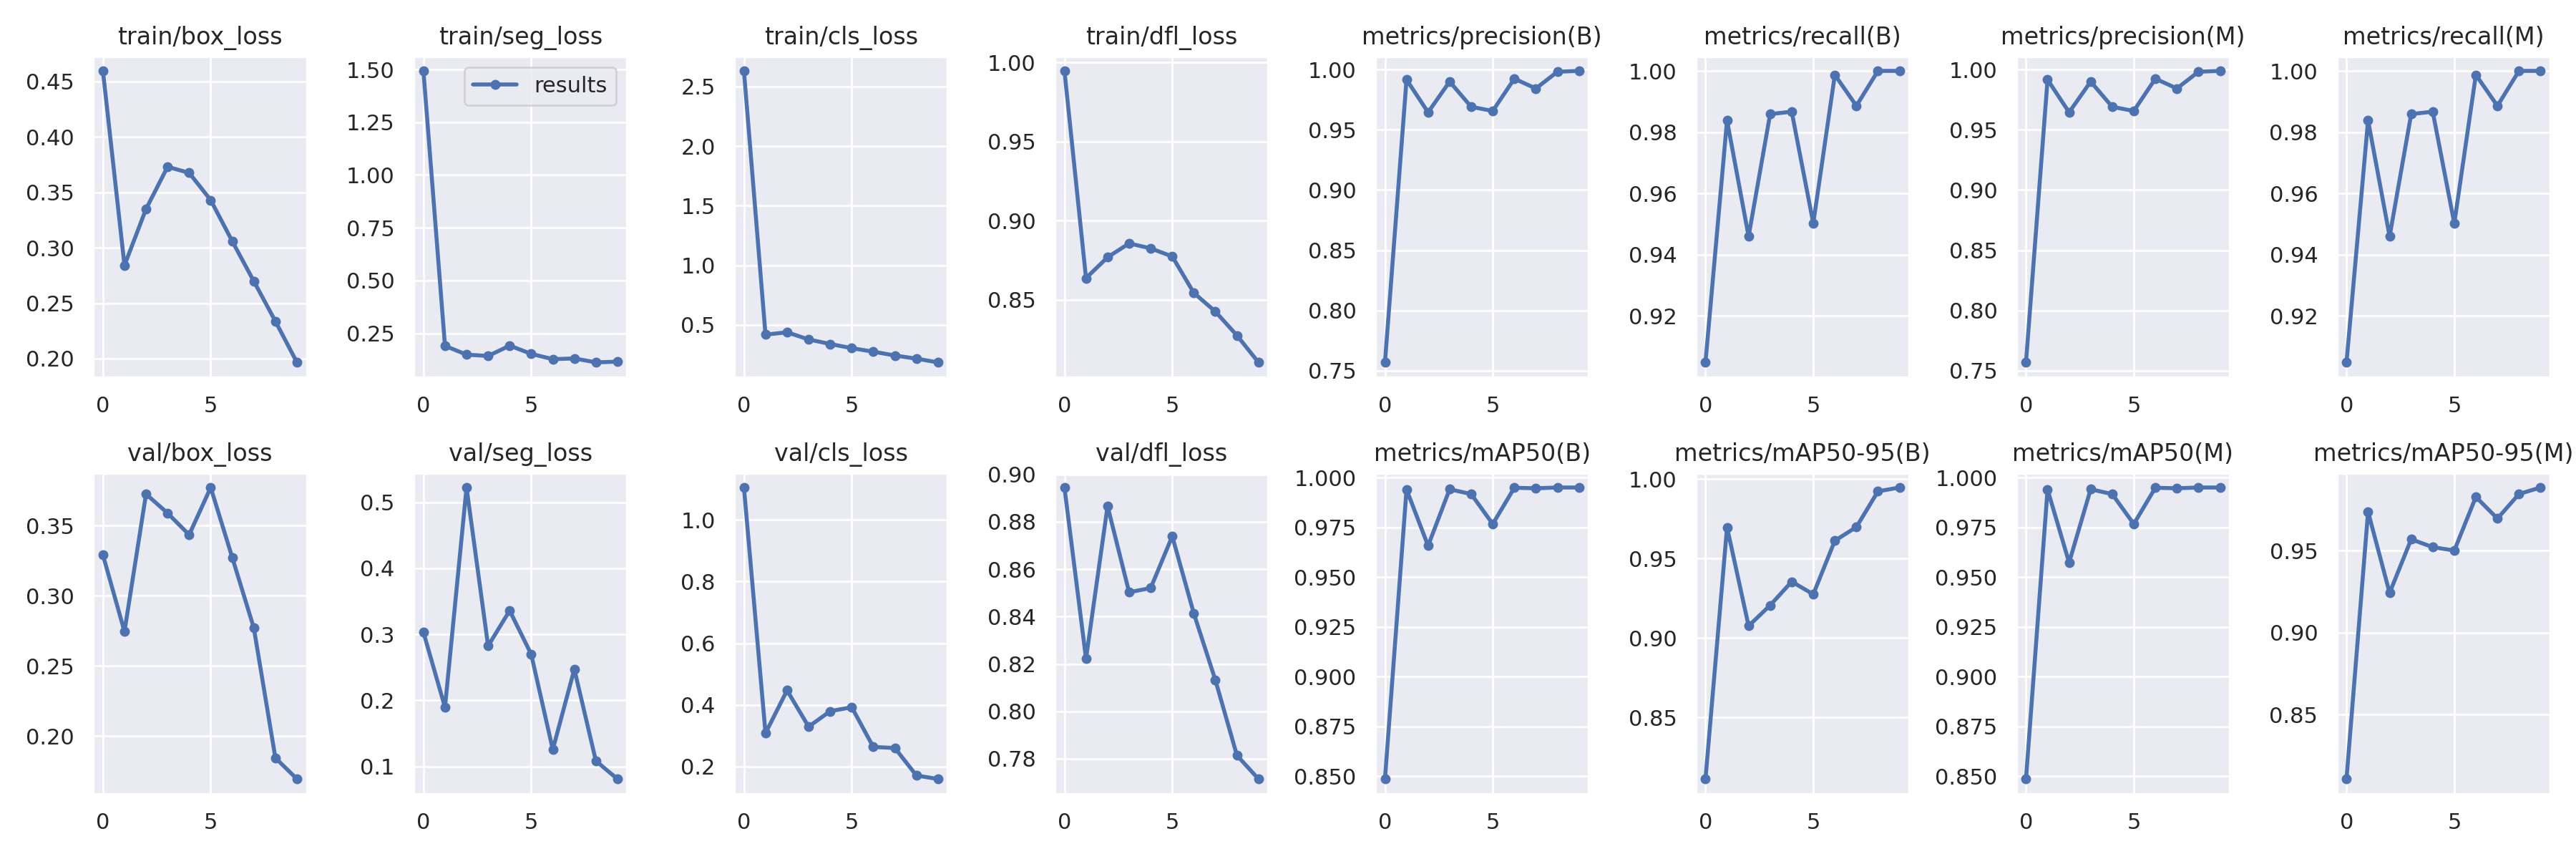

In [34]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

/content


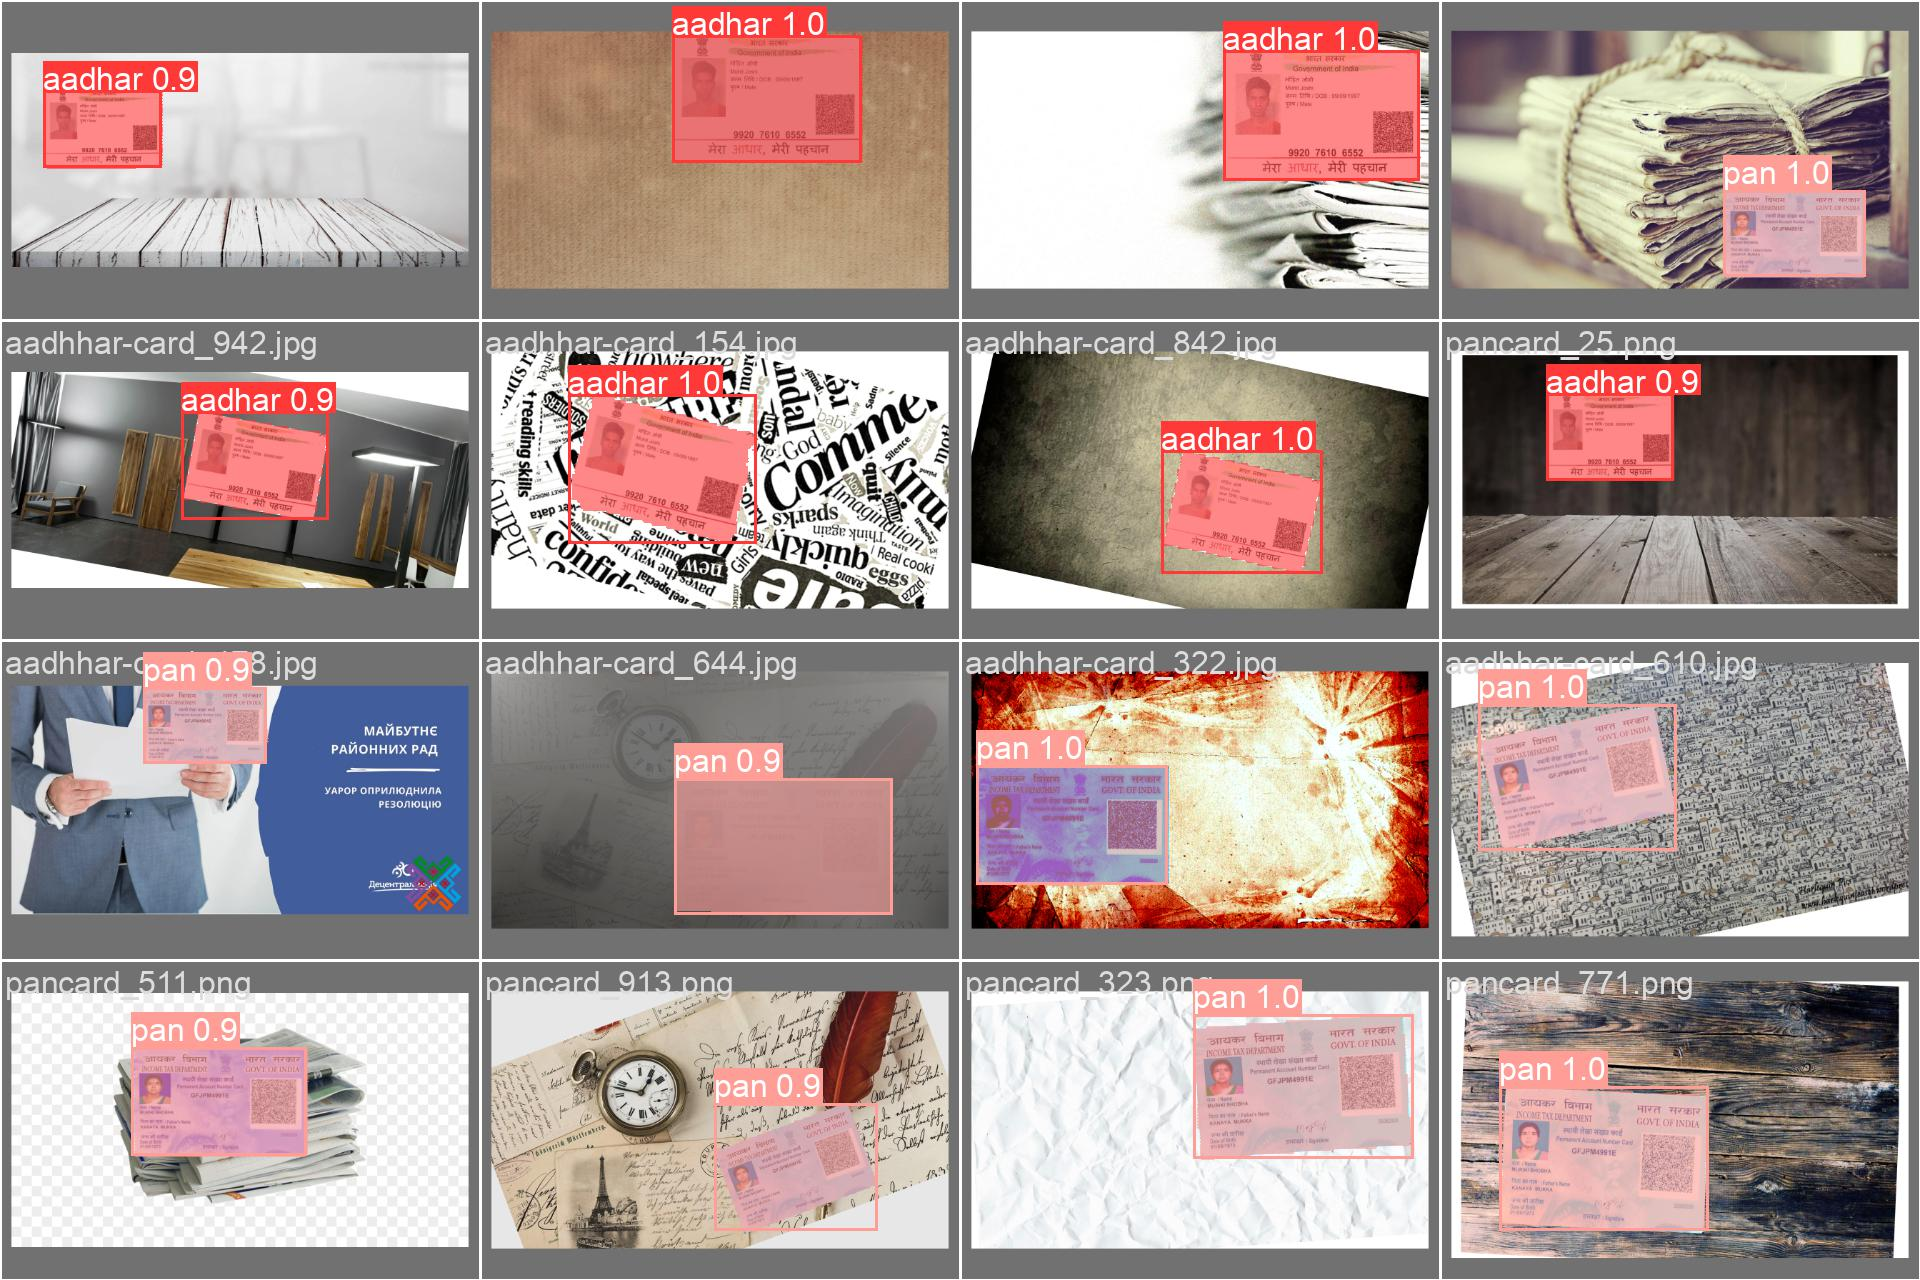

In [35]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [36]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data=data2.yaml

/content
2023-07-23 10:07:35.861815: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 10:07:37.246081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/pan-aaddhar-sample-yolo-format-cnt-1k/val.cache... 145 images, 0 backgrounds, 0 corrupt: 100% 145/145 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 10/10 [00:10<00:00,  1.06s/it]
                   all        145        145      0.999          1    

## Inference with Custom Model

In [37]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source='/content/pan-aaddhar-sample-yolo-format-cnt-1k/val' save=true

/content
2023-07-23 10:08:12.302302: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 10:08:13.200811: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/145 /content/pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_114.jpg: 448x640 1 aadhar, 80.7ms
image 2/145 /content/pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_144.jpg: 640x640 1 aadhar, 21.9ms
image 3/145 /content/pan-aaddhar-sample-yolo-format-cnt-1k/val/aadhhar-card_154.jpg: 384x640 1 aadhar, 132.1ms
image 4/145 /content/pan-aaddhar-sample-yolo-forma

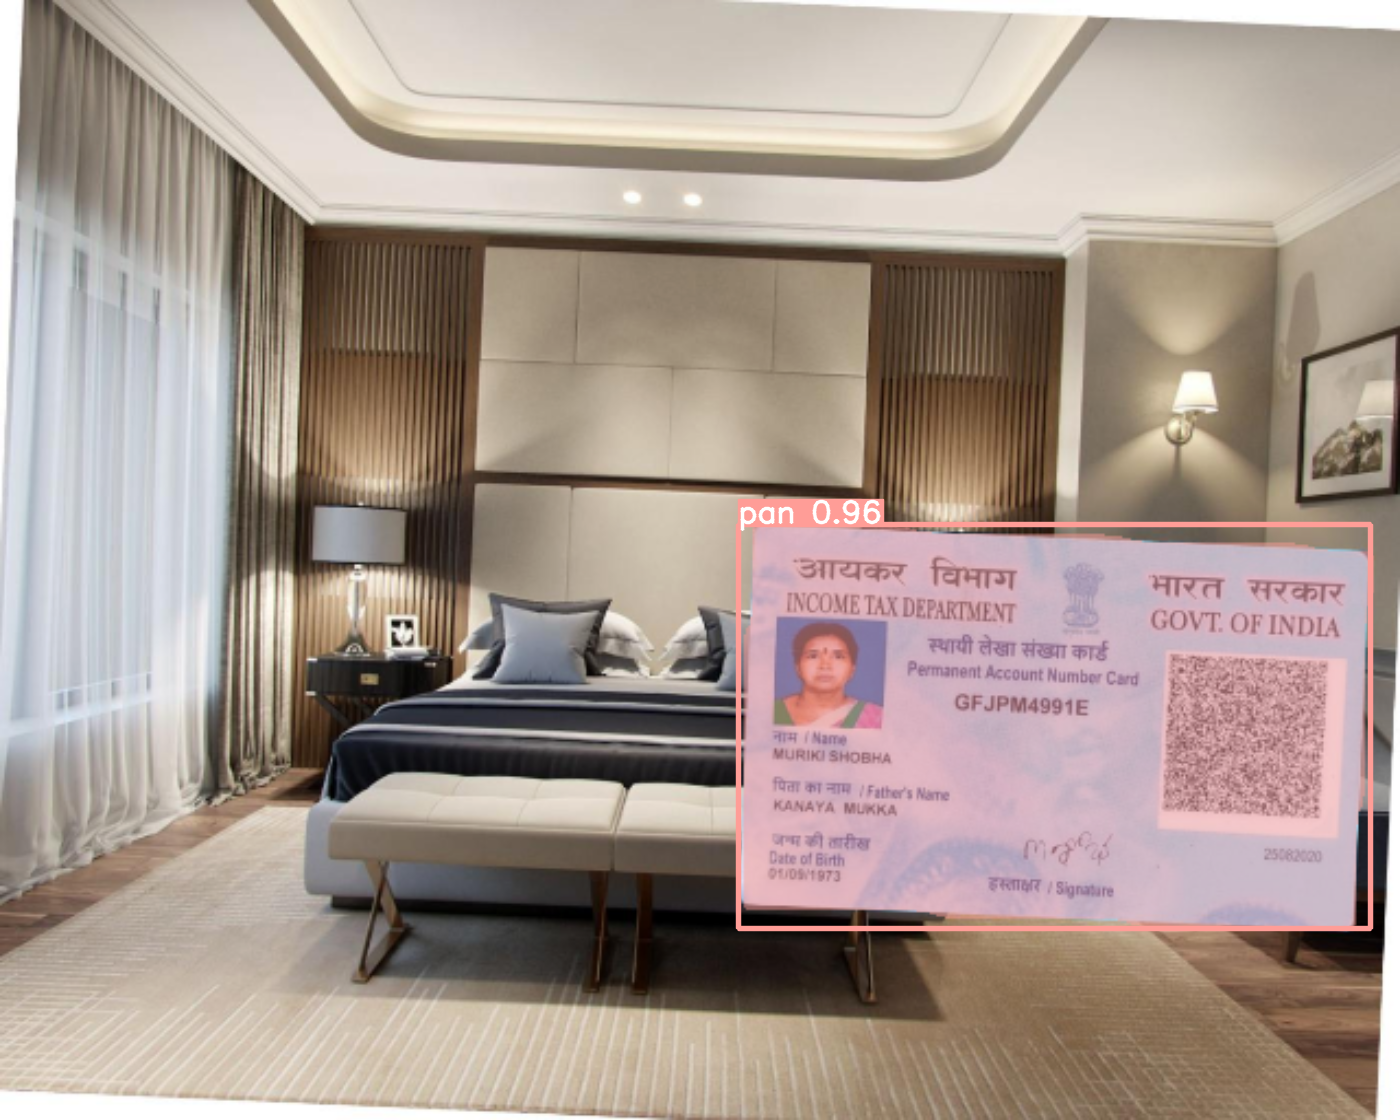

In [38]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.png')[:1]:
      display(Image(filename=image_path, height=600))
      print("\n")

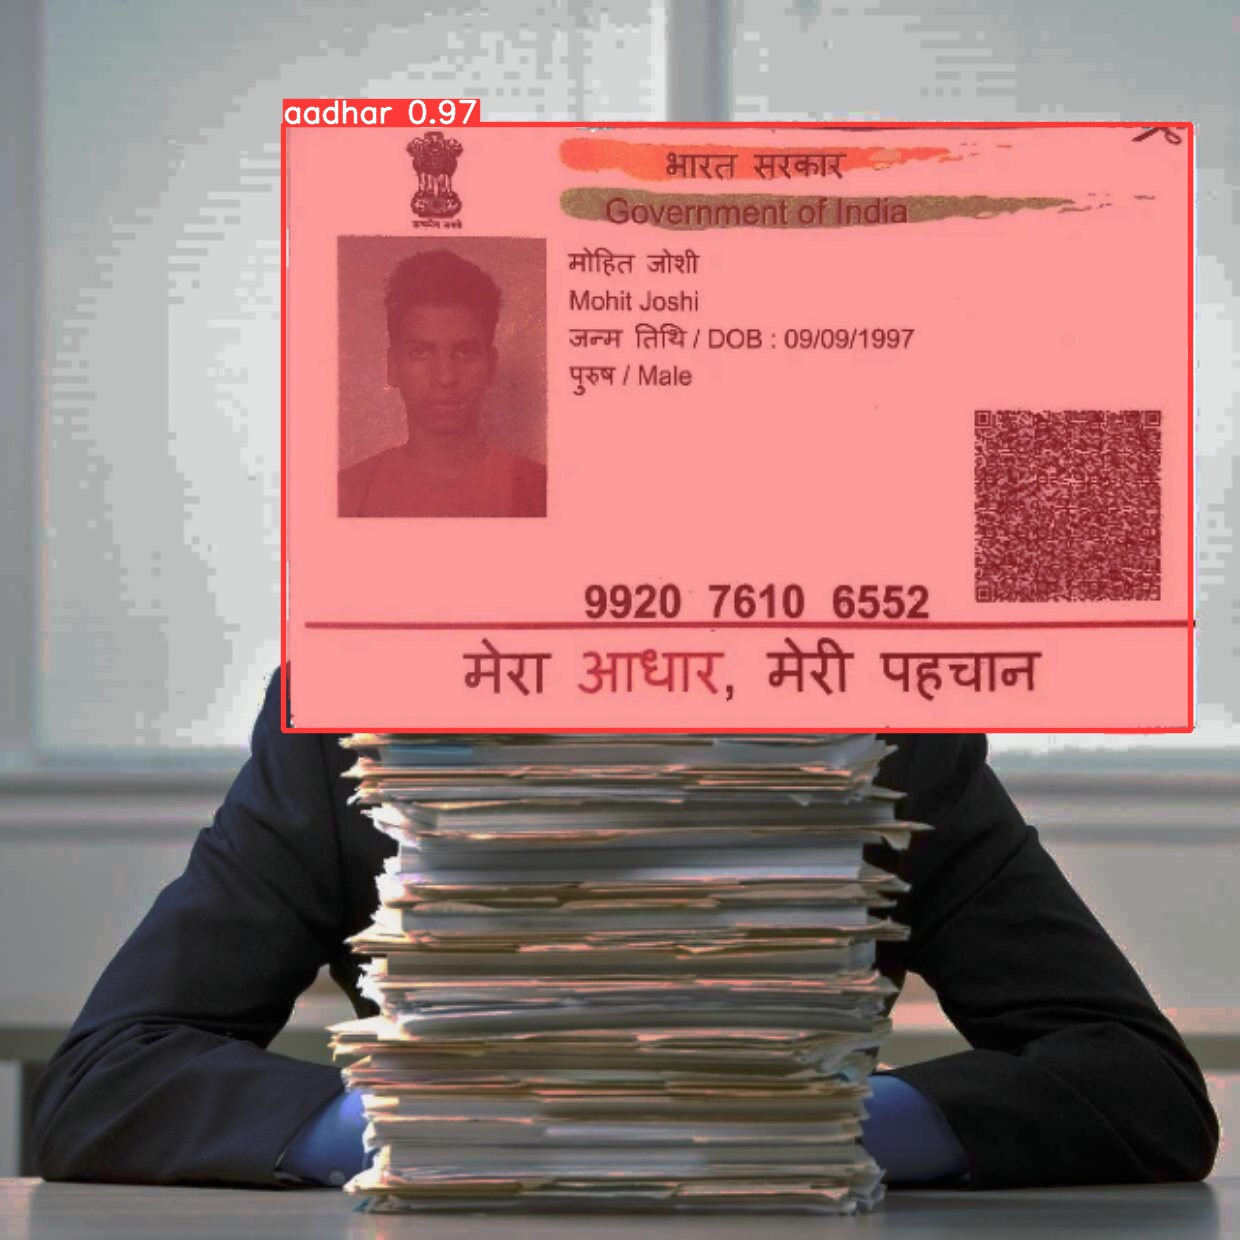

In [39]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:1]:
      display(Image(filename=image_path, height=600))
      print("\n")